# Part 1. 기본 세팅

## 1.FDR install

In [ ]:
pip install FinanceDataReader

## 2.import library

In [ ]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

# Part 2. 파일 세팅

## 1.Stock Info

In [ ]:
moon_19 = {
    '우리들휴브레인': '118000',
    '바른손': '018700',
    '고려산업': '002140',
    'DSR제강': '069730',
    'DSR': '155660'}

moon_19

{'우리들휴브레인': '118000',
 '바른손': '018700',
 '고려산업': '002140',
 'DSR제강': '069730',
 'DSR': '155660'}

# Part3. 상관계수 찾기

In [ ]:
#  선거 이전: "2016-07-10", "2017-03-09"
item_list = []
for item_code in moon_19.values():
    change = fdr.DataReader(item_code, "2016-07-10", "2017-03-09")['Close']
    item_list.append(change)

moon_1617 = pd.concat(item_list, axis=1)
moon_1617.columns = moon_19.keys()
moon_1617.reset_index(inplace=True)

moon_1617 ['Date'] = pd.to_datetime(moon_1617 ['Date'])
moon_1617 .set_index('Date', inplace=True)

moon_1617.corr = moon_1617.corr() 

NameError: ignored

In [ ]:
# 선거 기간~당선 (2017-03-10 ~ 2017-05-09)

item_list = []
for item_code in moon_19.values():
    change = fdr.DataReader(item_code, "2017-03-10", "2017-05-09")['Close']
    item_list.append(change)

moon_elect = pd.concat(item_list, axis=1)
moon_elect.columns = moon_19.keys()
moon_elect.reset_index(inplace=True)

moon_elect ['Date'] = pd.to_datetime(moon_elect ['Date'])
moon_elect .set_index('Date', inplace=True)

moon_elect.corr = moon_elect.corr() 

In [ ]:
# 당선이후 재임시절까지 (2017-05-10 ~ 2021-10-01)
item_list = []
for item_code in moon_19.values():
    change = fdr.DataReader(item_code, "2017-05-10", "2021-10-01")['Close']
    item_list.append(change)

moon_1721 = pd.concat(item_list, axis=1)
moon_1721.columns = moon_19.keys()
moon_1721.reset_index(inplace=True)

moon_1721['Date'] = pd.to_datetime(moon_1721['Date'])
moon_1721.set_index('Date', inplace=True)

moon_1721.corr = moon_1721.corr() 

# Part4.시각화

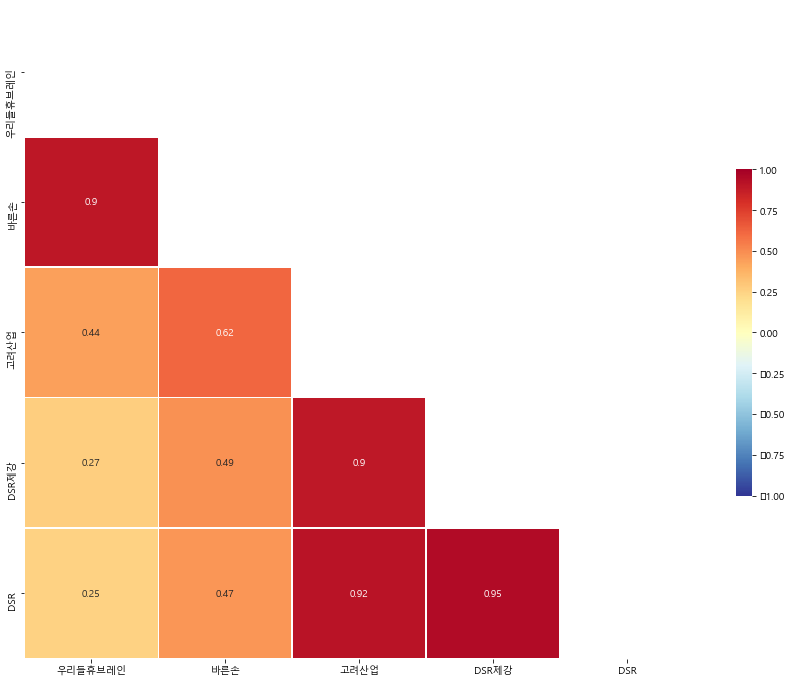

In [ ]:
#  선거 이전: "2016-07-10", "2017-03-09"
fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_1617.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_1617.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

plt.savefig('19대_문재인_상관관계_선거이전.png', dpi=300)
#plt.show()

In [ ]:
# 선거 기간~당선 (2017-03-10 ~ 2017-05-09)
fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_elect.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_elect.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
# 당선이후 재임시절까지 (2017-05-10 ~ 2021-10-01)
fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_1721.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_1721.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# Part5. 딕셔너리 모음

## 1.후보별 테마주 딕셔너리 

* 17_lee_dict = {
    '삼호개발': '010960',
    '이화공영': '001840',
    '홈센타홀딩스': '060560',
    '특수건설': '026150',
    '동신건설': '025950'}


* 17_jeong_dict = {
    '세명전기':'017510',
    '코마스인':'045390',
    '미주레일':'078940',
    '케이아이씨':'007460'
    '일경': '008540'}


* 18_park_dict = {
    'EG':'037370',
    '비트컴퓨터':'032850',
    '대유플러스':'000300',
    '대유에이텍':'002880',
    '서한':'011370'}


* 18_moon_dict = {
    '우리들휴브레인': '118000',
    '바른손': '018700',
    '조광페인트': '004910',
    '유성티엔에스': '024800',
    '신일산업': '002700'}


* 19_moon_dict = {
    '우리들휴브레인': '118000',
    '바른손': '018700',
    '신일산업': '002700',
    'DSR제강': '069730',
    'DSR': '155660'}


* 19_hong_dict= {
    '한국선재': '025550',
    '영화금속' : '012280',
    '동방선기' :'099410',
    '두올' : '016740',
    '세우글로벌': '013000'}

## 2.후보별 기간

* 17대
> 선거 이전: "2006-08-20", "2007-04-22"
> 선거 기간~당선 "2007-04-23",  "2007-12-20"
> 당선이후 재임시절까지 "2007-12-21",  "2013-02-23"

* 18대
> 선거 이전: "2011-08-22", "2012-04-22"
> 선거 기간~당선 "2012-04-23", "2012-12-19"
> 당선이후 재임시절까지 "2012-12-20", "2017-03-10"

* 19대
> 선거 이전: "2016-07-10", "2017-03-09"
> 선거 기간~당선 "2017-03-10", "2017-05-09"
> 당선이후 재임시절까지 "2017-05-10", "2020-10-01"